<a href="https://colab.research.google.com/github/Ttm2025/test/blob/main/KAz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from IPython.display import display, Math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp
import math
def add(x, y): return ['+', x, y]
def sub(x, y): return ['-', x, y]
def mul(x, y): return ['*', x, y]
def div(x, y): return ['/', x, y]
def power(x, y): return ['^', x, y]
def negative(x): return ['~', x]
def abs_(x): return ['abs', x]
def sin_(x): return ['sin', x]
def cos_(x): return ['cos', x]
def tan_(x): return ['tan', x]
def arcsin_(x): return ['arcsin', x]
def arccos_(x): return ['arccos', x]
def arctan_(x): return ['arctan', x]
def sinh_(x): return ['sinh', x]
def cosh_(x): return ['cosh', x]
def tanh_(x): return ['tanh', x]
def arcsinh_(x): return ['arcsinh', x]
def arccosh_(x): return ['arccosh', x]
def arctanh_(x): return ['arctanh', x]
def sqrt_(x): return ['sqrt', x]
def ln_(x):  return ['ln',x]
def lg_(x):  return ['lg',x]
def root_(x,y):  return ['r',x, y]
def log_(x,y):  return ['g',x, y]
def exp_(x): return ['exp', x]
def fac_(x): return ['fac', x]



def fix(x):
  if isinstance(x, Expression):
    return x
  return Expression(x)
def abs(x):
  return Expression(abs_(fix(x).T))
def sin(x):
  return Expression(sin_(fix(x).T))
def cos(x):
  return Expression(cos_(fix(x).T))
def tan (x):
  return Expression(tan_(fix(x).T))
def arcsin(x):
  return Expression(arcsin_(fix(x).T))
def arccos(x):
  return Expression(arccos_(fix(x).T))
def arctan (x):
  return Expression(arctan_(fix(x).T))
def sinh(x):
  return Expression(sinh_(fix(x).T))
def cosh(x):
  return Expression(cosh_(fix(x).T))
def tanh (x):
  return Expression(tanh_(fix(x).T))
def arcsinh(x):
  return Expression(arcsinh_(fix(x).T))
def arccosh(x):
  return Expression(arccosh_(fix(x).T))
def arctanh (x):
  return Expression(arctanh_(fix(x).T))
def sqrt(x):
  return Expression(sqrt_(fix(x).T))
def root(x,y):
  return Expression(root_((fix(x).T),fix(y).T))
def log(x,y):
  return Expression(log_((fix(x).T),fix(y).T))
def ln(x):
  return Expression(ln_(fix(x).T))
def lg(x):
  return Expression(lg_(fix(x).T))
def fac(x):
  return Expression(fac_(x))
def fac1(x):
  return 1 if x < 2 else x * fac1(x - 1) 
def abs1(x):
  if x<0:
    return(x * -1)

def show(x):
  display(Math(latex(x)))

def enclose(x):
  return f'\\left( {x} \\right)'

def latex(x):
  if isinstance(x, Expression):
    return latex(x.T)
  if isinstance(x, (int, str)):
    return str(x)
  op = x[0]
  if op in '+-*/^r':
    l, r = latex(x[1]), latex(x[2])
    if op == '+':
      return f'{l} + {r}'
    if op == '-':
      return f'{l} - {r}'
    if op == '*':
      return f'{l} \\cdot {r}'
    if op == '/':
      return f'\\dfrac{{{l}}}{{{r}}}'
    if op == 'r':
      return f'\sqrt {[r]} {{{l}}}'
    if op == 'g':
      return f'\log {_r} {{{l}}}'
    if op == '^':
      if isinstance(x[1], list):
        l = enclose(l)
      return f'{{{l}}}^{{{r}}}'
  else: 
    a = latex(x[1])
    if op == '~':
      return f'- {a}'
    if op == 'abs':
      return f'\\mid {a}\mid'
    if op == 'sin':
      return f'\\sin {a}'
    if op == 'cos':
      return f'\\cos {a}'
    if op == 'tan':
      return f'\\tan {{{a}}}'
    if op == 'arcsin':
      return f'\\arcsin {a}'
    if op == 'arccos':
      return f'\\arccos {a}'
    if op == 'arctan':
      return f'\\arctan {{{a}}}'
    if op == 'sinh':
      return f'\\sinh {a}'
    if op == 'cosh':
      return f'\\cosh {a}'
    if op == 'tanh':
      return f'\\tanh {{{a}}}'
    if op == 'arcsinh':
      return f'\\arcsinh {a}'
    if op == 'arccosh':
      return f'\\arccosh {a}'
    if op == 'arctanh':
      return f'\\arctanh {{{a}}}'
    if op == 'sqrt':
      return f'\\sqrt{{{a}}}'
    if op == 'ln':
      return f'\\ln{{{a}}}'
    if op == 'lg':
      return f'\\lg{{{a}}}'
    if op == 'exp':
      return f'e ^ {{{a}}}'
    if op == 'fac':
      return f'{a}!'

def symbols(s):
  S = s.split()
  if len(S) == 1:
    return Expression(s)
  return (Expression(i) for i in S)

def evalf(x, arg = {}):
  if isinstance(x, Expression):
    if isinstance(arg, dict):
      arg = {i.T: arg[i] for i in arg}
    else:
      arg = {'$': arg}
    return evalf(x.T, arg)
  if isinstance(x, int):
    return x
  if isinstance(x, str):
    if x in arg:
      return arg[x]
    return arg['$']
  op = x[0]
  if op in '+-*/^rg':
    l, r = evalf(x[1], arg), evalf(x[2], arg)
    if op == '+':
      return l + r
    if op == '-':
      return l - r
    if op == '*':
      return l * r
    if op == '/':
      return l / r
    if op == '^':
      return l ** r
    if op == 'r':
      return r ** (1/l)
    if op == 'g':
      return np.log(l,r)
  
  else:
    a = evalf(x[1], arg)
    if op == '~':
      return - a
    if op == 'abs':
      return np.absolute(a)
    if op == 'sin':
      return np.sin(a)
    if op == 'cos':
      return np.cos(a)
    if op == 'tan':
      return np.tan(a)
    if op == 'arcsin':
      return np.arcsin(a)
    if op == 'arccos':
      return np.arccos(a)
    if op == 'arctan':
      return np.arctan(a)
    if op == 'sinh':
      return np.sinh(a)
    if op == 'cosh':
      return np.cosh(a)
    if op == 'tanh':
      return np.tanh(a)
    if op == 'arcsinh':
      return np.arcsinh(a)
    if op == 'arccosh':
      return np.arccosh(a)
    if op == 'arctanh':
      return np.arctanh(a)
    if op == 'sqrt':
      return np.sqrt(a)
    if op =='ln':
      return np.log(a)
    if op =='lg':
      return np.log10(a)
    if op =='fac':
      return fac1(a)
  return None

def plot(y, x):
  X = np.linspace(x[1], x[2], 1000)
  Y = evalf(y, {x[0]: X})
  plt.plot(X, Y)

class Expression:
  def __init__(self, x):
    self.T = x
  def __add__(self, x):
    return Expression(add(self.T, fix(x).T))
  def __radd__(self, x):
    return Expression(add(fix(x).T, self.T))
  def __sub__(self, x):
    return Expression(sub(self.T, fix(x).T))
  def __rsub__(self, x):
    return Expression(sub(fix(x).T, self.T))
  def __mul__(self, x):
    return Expression(mul(self.T, fix(x).T))
  def __rmul__(self, x):
    return Expression(mul(fix(x).T, self.T))
  def __truediv__(self, x):
    return Expression(div(self.T, fix(x).T))
  def __rtruediv__(self, x):
    return Expression(div(fix(x).T, self.T))
  def __pow__(self, x):
    return Expression(power(self.T, fix(x).T))
  def __rpow__(self, x):
    return Expression(power(fix(x).T, self.T))
  def __neg__(self):
    return Expression(negative(self.T)) 

def exp(x):
  return Expression(exp_(fix(x).T))
def Z(x):
  return Expression(x)
def isInt(x):
  return isinstance(x.T, int)

def get_gcd(n, m):
    while m > 0:
        n, m = m, n % m
    return n
def normalize(n,m):
  if m < 0:
      n *= -1
      m *= -1
  gcd = get_gcd(n, m)
  n //= gcd
  m //= gcd
  return(n,m)

def taylorCoeffs(y, x, n, x0):
  A = [evalf(y, x0)]
  dy = diff(y, x)
  for i in range(n):
    A.append(evalf(dy, x0))
    dy = diff(dy, x)
  return A

def taylorTerm(a, x, n, x0):
  a, x0 = int(a), int(x0)
  if n == 0:
    return Z(a)
  d = x
  if x0 > 0: 
    d = x - x0
  elif x0 < 0: 
    d = x + (-x0)
  if n == 1:
    return a * d
  n1=int(Z(a).T)
  m1=int(fac1(n))
  m=normalize(n1,m1)
  if m[1]==1:
    return (Z(m[0]) * d ** n)
  else:
    return (Z((m[0]) / Z(m[1])) * d ** n)

def taylorSeries(y, x, n, x0 = 0):
  A = taylorCoeffs(y, x, n, x0)
  f = None
  for i in range(n + 1):
    if A[i] == 0:
      continue
    elif A[i] > 0:
      t = taylorTerm(A[i], x, i, x0)
      f = t if f == None else f + t
    else:
      t = taylorTerm(-A[i], x, i, x0)
      f = -t if f == None else f - t
  if f == None:
    f = Z(0)
  return f


def diff(y, x):
  if isInt(y):
    return Z(0)
  if isinstance(y.T, str):
    if y.T == x.T:
      return Z(1)
    return Z(0)
  op = y.T[0] 
  if op in '+-*/^':
    u, v = Expression(y.T[1]), Expression(y.T[2])
    du, dv = diff(u, x), diff(v, x)
    if op == '+':
      return du + dv
    if op == '-':
      return du - dv
    if op == '*':
      #if isInt(u): return u * dv # упрощение
      #if isInt(v): return du * v # упрощение
      return du * v + u * dv
    if op == '/':
      if isInt(u): return - u * dv / v ** 2 # упрощение
      if isInt(v): return du / v # упрощение
      return (du * v - u * dv) / v ** 2
    if op == '^':
      if isInt(v): # u(x) ^ n
        n = v.T
        if n == 0:
          return Z(0)
        if n == 1:
          return du
        if du.T == 1: return n * u ** (n - 1) # упрощение
        return n * u ** (n - 1) * du
      if isInt(u): # n ^ v(x)
        n = u.T
        return ln(n) * (u ** v) * dv
  else:
    u = Expression(y.T[1])
    du = diff(u, x)
    if op == '~': return -du
    if op == 'sin': return cos(u) * du
    if op == 'cos': return -sin(u) * du
    if op == 'tan': return du/ (sin(u)**2)
    if op == 'sqrt': return du / (2 * sqrt(u))
    if op == 'ln': return du / u
    if op == 'exp': return exp(u) * du
    if op == 'sqrt': return 1/2*du
    if op == 'arcsin': return du/(sqrt(1-u**2))
    if op == 'arccos': return -du/(sqrt(1-u**2))
    if op == 'arctan': return du/(1+u**2)
    if op == 'sinh': return cosh(u) * du
    if op == 'cosh': return sinh(u) * du
    if op == 'tanh': return du/ (cosh(u)**2)
    if op == 'arcsinh': return du/(sqrt(u**2+1))
    if op == 'arccosh': return du/(sqrt(u**2-1))
    if op == 'arctanh': return du/(1-u**2)
  return None
def Diff(y, x, n = 1):
  dy = y
  for i in range(n):
    dy = diff(dy, x)
  return dy

In [109]:
  x = Expression('x')
  y = Expression('y')
  show(diff(x+y,x))
  show(diff(x-y,x))
  show(diff(x*y,x))
  show(diff(x/y,x))
  show(diff(x**5,x))
  show(diff(5**x,x))
  show(diff(sqrt(x),x))
  show(diff(ln(x),x))
  show(diff(exp(x),x))
  show(diff(sin(x),x))
  show(diff(cos(x),x))
  show(diff(tan(x),x))
  show(diff(arcsin(x),x))
  show(diff(arccos(x),x))
  show(diff(arctan(x),x))
  show(diff(sinh(x),x))
  show(diff(cosh(x),x))
  show(diff(tanh(2*x),x))
  show(diff(arcsinh(x),x))
  show(diff(arccosh(x),x))
  show(diff(arctanh(x),x))
  show((x+1)/fac(5))
  print("")
  print(evalf(fac(5)))
  print("")
  for n in range(5):
    show(Diff(x ** 3, x, n))
  print("")

  f = taylorSeries(ln(x+1), x, 6, 0)
  show(f)



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


120



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


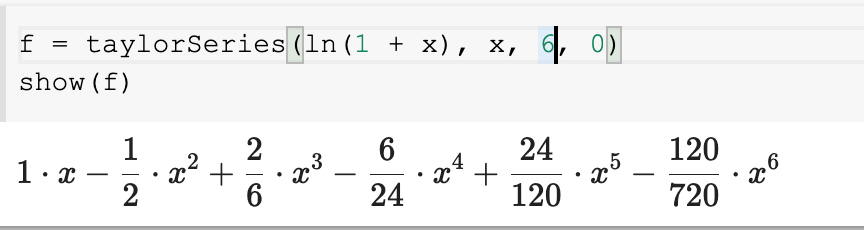

In [110]:
f = (x - 1) ** 2 * (3 * x - 2) * (x + 2)
show(f)
g = taylorSeries(f, x, 4)
show(g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

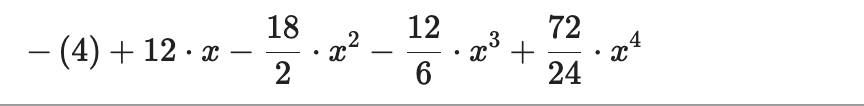